{'normal': 0, 'osteopenia': 1, 'osteoporosis': 2}
['normal', 'osteopenia', 'osteoporosis']
[0, 1, 2]


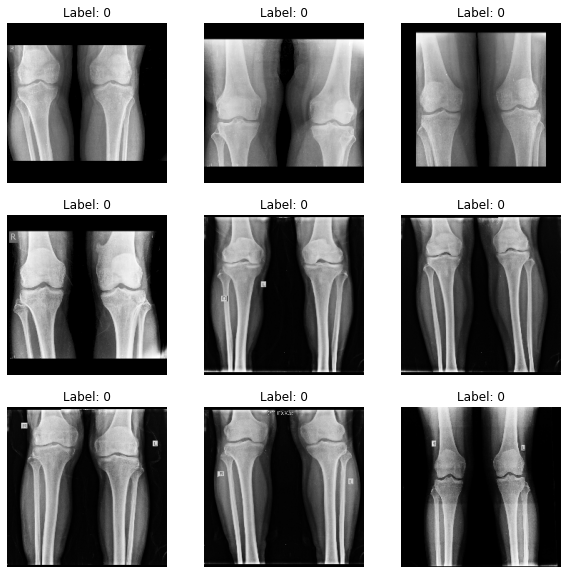

D:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(239, 3)
(239, 224, 224, 1)
Converted X_train_rgb shape: (152, 224, 224, 3)
Converted X_val_rgb shape: (39, 224, 224, 3)
Epoch 1/10
5/5 [==============================] - 33s 5s/step - loss: 31.4694 - accuracy: 0.4408 - val_loss: 16.8556 - val_accuracy: 0.2308
Epoch 2/10
5/5 [==============================] - 21s 4s/step - loss: 11.8499 - accuracy: 0.5987 - val_loss: 28.5846 - val_accuracy: 0.5897
Epoch 3/10
5/5 [==============================] - 20s 4s/step - loss: 12.2218 - accuracy: 0.6776 - val_loss: 6.9155 - val_accuracy: 0.5128
Epoch 4/10
5/5 [==============================] - 21s 4s/step - loss: 4.3382 - accuracy: 0.4539 - val_loss: 3.5136 - val_accuracy: 0.5897
Epoch 5/10
5/5 [==============================] - 25s 5s/step - loss: 2.3315 - accuracy: 0.7566 - val_loss: 7.7221 - val_accuracy: 0.5897
Epoch 6/10
5/5 [==============================] - 20s 4s/step - loss: 2.1030 - accuracy: 0.7368 - val_loss: 2.8935 - val_accuracy: 0.4615
Epoch 7/10
5/5 [==============================

In [1]:
import cv2,os

data_path="Osteoporosis_Knee_X-ray"
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

import os
import cv2
import matplotlib.pyplot as plt

img_size = 224
data = []
target = []

for category in categories:
    folder_path = os.path.join(data_path, category)
    img_names = os.listdir(folder_path)
    
    for img_name in img_names:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image as grayscale
        resized = cv2.resize(img, (img_size, img_size))   # Resize image
        
        # Append resized image and corresponding label to data and target lists
        data.append(resized)
        target.append(label_dict[category])

# Convert lists to numpy arrays for compatibility with deep learning frameworks
# data = np.array(data)
# target = np.array(target)

# Display a sample of images for verification
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(data[i], cmap='gray')
    plt.title('Label: {}'.format(target[i]))
    plt.axis('off')
plt.show()


import numpy as np

from keras.utils import to_categorical as to


data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

new_target=to(target)
# new_target
data.shape

np.save('knee_data',data)
np.save('knee_target',new_target)

import numpy as np

data=np.load('knee_data.npy')
target=np.load('knee_target.npy')


print(target.shape)
print(data.shape)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.2,random_state=2)
# x_train

import numpy as np
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load DenseNet121 with imagenet weights (pre-trained)
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
# model.summary()


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2)

import numpy as np

X_train_rgb = np.repeat(x_train, 3, axis=-1)
X_val_rgb = np.repeat(x_val, 3, axis=-1)

print("Converted X_train_rgb shape:", X_train_rgb.shape)
print("Converted X_val_rgb shape:", X_val_rgb.shape)



model.fit(X_train_rgb, y_train, validation_data=(X_val_rgb, y_val), epochs=10, batch_size=32)





In [ ]:

model.fit(X_train_rgb, y_train, validation_data=(X_val_rgb, y_val), epochs=10, batch_size=32)
